In [ ]:
import os
import pandas as pd

In [ ]:
data = pd.read_csv("usa_house_stats.csv")
data.head()

,id,date,cost,bedrooms,bathrooms,square,square_lot,floors,view,condition,grade,square_above,square_basement,lat,long
0,3629160060,20150227T000000,720000.0,4,2.75,3370,7634,1.0,2,5,8,2110,1260,47.5259,-122.204
1,4058800830,20150318T000000,612000.0,6,3.00,3840,14040,1.5,3,3,8,2460,1380,47.5060,-122.241
2,2214800270,20140925T000000,355000.0,4,2.50,2770,7000,1.0,0,4,7,1940,830,47.3396,-122.256
3,1328330350,20150213T000000,390000.0,3,1.75,1320,7725,1.0,0,3,8,1320,0,47.4425,-122.133
4,8651580310,20140528T000000,621138.0,3,2.25,2180,7741,2.0,0,3,9,2180,0,47.6482,-122.072


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4654 non-null   int64  
 1   date             4654 non-null   object 
 2   cost             4654 non-null   float64
 3   bedrooms         4654 non-null   int64  
 4   bathrooms        4654 non-null   float64
 5   square           4654 non-null   int64  
 6   square_lot       4654 non-null   int64  
 7   floors           4654 non-null   float64
 8   view             4654 non-null   int64  
 9   condition        4654 non-null   int64  
 10  grade            4654 non-null   int64  
 11  square_above     4654 non-null   int64  
 12  square_basement  4654 non-null   int64  
 13  lat              4654 non-null   float64
 14  long             4654 non-null   float64
dtypes: float64(5), int64(9), object(1)
memory usage: 545.5+ KB


In [ ]:
data.describe()

,id,cost,bedrooms,bathrooms,square,square_lot,floors,view,condition,grade,square_above,square_basement,lat,long
count,4.654000e+03,4.654000e+03,4654.000000,4654.000000,4654.000000,4.654000e+03,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,4.554878e+09,5.347083e+05,3.370004,2.082563,2060.906532,1.631941e+04,1.442845,0.249248,3.443060,7.597980,1761.503868,299.402664,47.560138,-122.216166
std,2.895396e+09,3.550061e+05,0.901899,0.759489,892.875408,5.042193e+04,0.515043,0.788493,0.664796,1.166443,815.499747,440.119380,0.141340,0.142013
min,1.200019e+06,8.400000e+04,0.000000,0.000000,384.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,384.000000,0.000000,47.155900,-122.509000
25%,2.025049e+09,3.199125e+05,3.000000,1.500000,1430.000000,5.360250e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,47.468350,-122.331000
50%,3.905085e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.738500e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,47.575150,-122.236000
75%,7.308001e+09,6.388750e+05,4.000000,2.500000,2520.000000,1.086150e+04,2.000000,0.000000,4.000000,8.000000,2160.000000,600.000000,47.679300,-122.127000
max,9.900000e+09,5.570000e+06,9.000000,6.000000,9200.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,7880.000000,3000.000000,47.777500,-121.315000


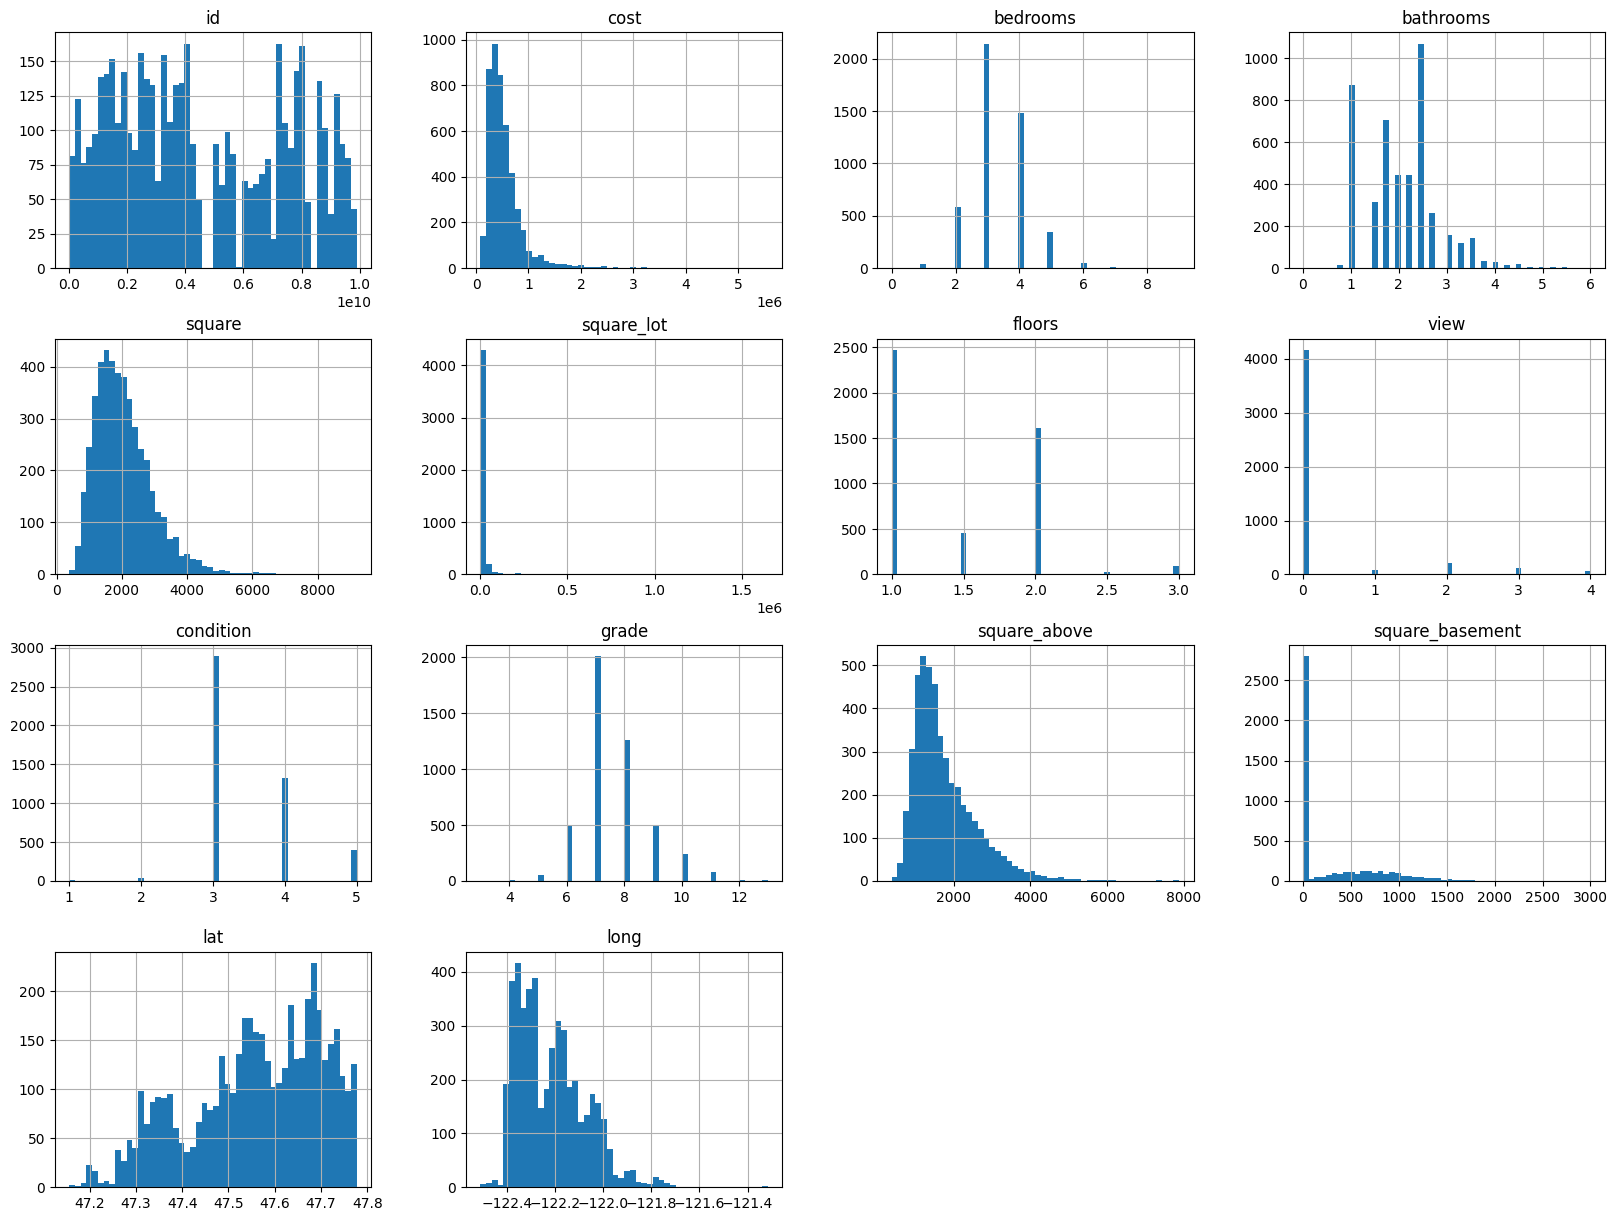

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))

plt.show()

<Axes: >

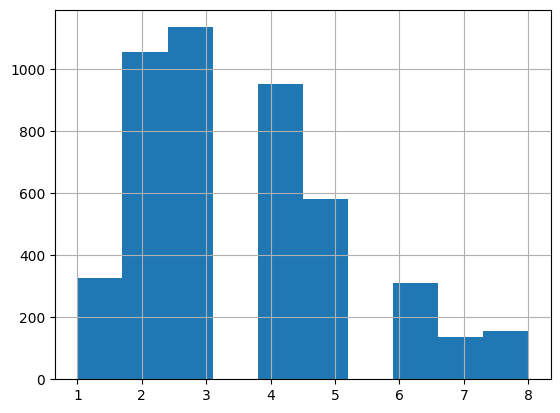

In [ ]:
import numpy as np

data['square_cut'] = pd.cut(data['square'],
                              bins=[0., 1000., 1500, 2000, 2500, 3000, 3500, 4000, np.inf],
                              labels=[1, 2, 3, 4, 5, 6, 7, 8])

data['square_cut'].hist()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['square_cut']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_test_set['square_cut'].value_counts()/len(strat_test_set)

square_cut
3    0.243824
2    0.226638
4    0.205156
5    0.124597
1    0.070892
6    0.066595
8    0.033298
7    0.029001
Name: count, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("square_cut", axis=1, inplace=True)

In [ ]:
len(strat_train_set)

3723

In [ ]:
len(strat_test_set)

931

In [ ]:
data = strat_train_set.copy()

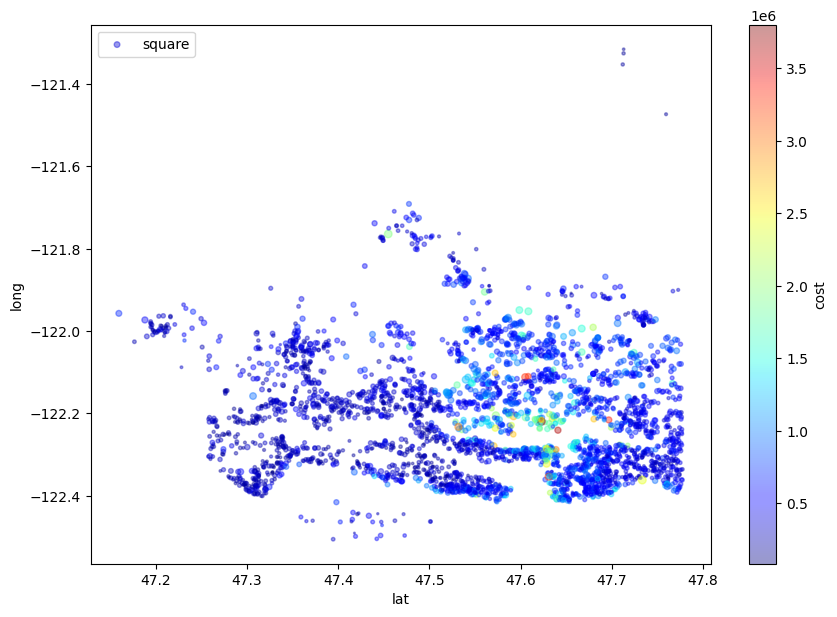

In [ ]:
map = {1: 50, 2: 150, 3: 350, 4: 550}
data.plot(kind='scatter', x='lat', y='long', alpha=0.4,
             s=data['square']/250, label='square', figsize=(10, 7),
             c='cost', cmap=plt.get_cmap('jet'))
plt.legend()

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost               1.000000
square             0.685094
grade              0.664436
square_above       0.583924
bathrooms          0.509959
view               0.419018
lat                0.330537
square_basement    0.298555
bedrooms           0.292602
floors             0.268352
square_lot         0.077757
condition          0.050003
long               0.014886
id                -0.026302
Name: cost, dtype: float64

In [ ]:
data['bathrooms_per_floors'] = data['bathrooms']/data['floors']

numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost                    1.000000
square                  0.685094
grade                   0.664436
square_above            0.583924
bathrooms               0.509959
view                    0.419018
lat                     0.330537
square_basement         0.298555
bedrooms                0.292602
floors                  0.268352
bathrooms_per_floors    0.231890
square_lot              0.077757
condition               0.050003
long                    0.014886
id                     -0.026302
Name: cost, dtype: float64

In [ ]:
data = strat_train_set.drop('cost', axis=1)
data_labels = strat_train_set["cost"].copy()

data_test = strat_test_set.drop('cost', axis=1)
labels_test = strat_test_set["cost"].copy()

In [ ]:
data_cat = data[['date']]
data_cat.head(10)


,date
2932,20141031T000000
2018,20140623T000000
1744,20140610T000000
2658,20140520T000000
4395,20150323T000000
376,20141028T000000
380,20150127T000000
3117,20150303T000000
4147,20140902T000000
1466,20150222T000000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["date"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [ ]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 607969.43145941 1214431.54094004  690634.8727661   212974.50054679
  892999.41179328]


In [ ]:
lin_reg.score(data_prepared, data_labels)

0.7110238485826903

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 80, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data_prepared)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75


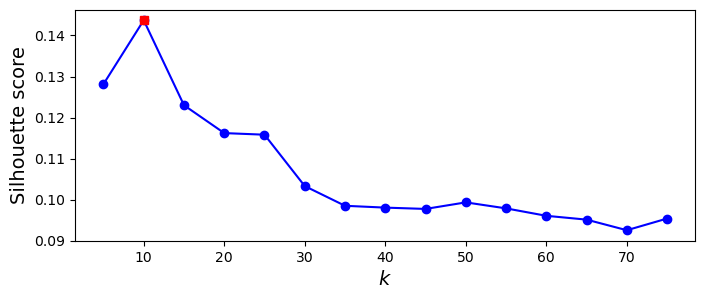

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(data_prepared, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

10

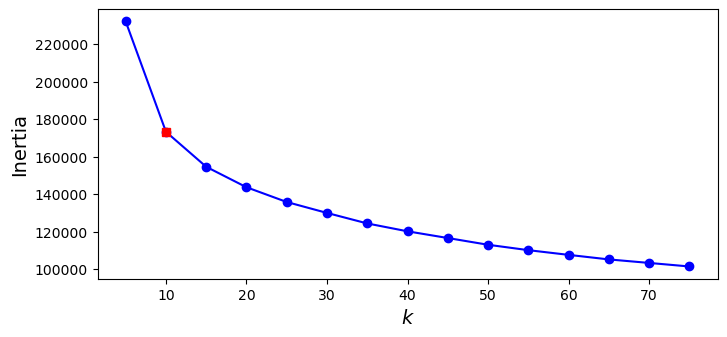

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [ ]:
best_model = kmeans_per_k[best_index]

In [ ]:
X_train_reduced = best_model.transform(data_prepared)

In [ ]:
X_train_reduced

array([[ 4.37003939,  2.0577677 ,  4.37503855, ...,  5.28398531,
         9.17746866, 13.23481943],
       [ 6.86897182,  5.23502794,  7.688759  , ...,  6.47391692,
        10.20108355, 13.62633193],
       [ 4.97821954,  2.44620723,  4.62687325, ...,  5.49360513,
         8.89289397, 13.21860327],
       ...,
       [ 4.91049274,  2.95553783,  5.4357978 , ...,  5.23398226,
         9.49154099, 13.19876434],
       [ 3.15472332,  2.87165442,  3.00873953, ...,  4.77506902,
         9.09192463, 13.15494264],
       [ 2.87260396,  5.38893467,  4.58011915, ...,  5.14265622,
        10.31786047, 13.50681887]])

In [ ]:
clusters = best_model.labels_

lin_reg.fit(clusters.reshape(-1, 1), data_labels)

LinearRegression()

In [ ]:
score = lin_reg.score(clusters.reshape(-1, 1), data_labels)
score

0.03639968867692689